In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset

In [2]:
df = pd.read_csv("../LAB/Project/dataset/DataSET.csv")

## Data cleaning

In [3]:
df['Latitude']=df['Latitude'].replace('c',None,regex=True).astype(float)
df = df.dropna(subset=['Latitude', 'Longitude'])
df.drop("Unnamed: 9", axis='columns', inplace=True)
df.drop("Unnamed: 10", axis='columns', inplace=True)
df["No.Reviews"].fillna(0, inplace = True)
m = df["Rating"].mean()
df["Rating"].fillna(m, inplace = True)
df["Timings"].fillna("",inplace = True)
df['No.Reviews']=df['No.Reviews'].replace('\,','',regex=True).astype(int)
df.notnull().all()

Name          True
Address       True
Rating        True
No.Reviews    True
Timings       True
Type          True
City          True
Latitude      True
Longitude     True
dtype: bool

In [4]:
cities = ['pune','mumbai','delhi','bengluru','kolkata','Ahmedabad','Chennai','nagpur','nashik','hydrabad','Aurangabad']
typ = ['Attraction','Hotel','Museums','Restaurant']

## EDA

In [5]:
x = df['City']
y = df['Type']
city = np.array(x)
types = np.array(y)

pune


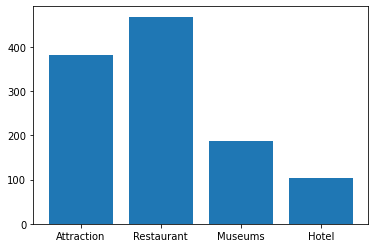

mumbai


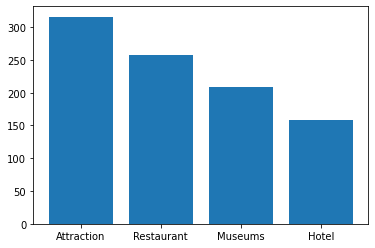

delhi


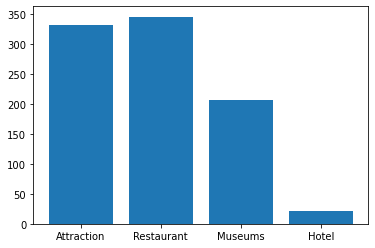

bengluru


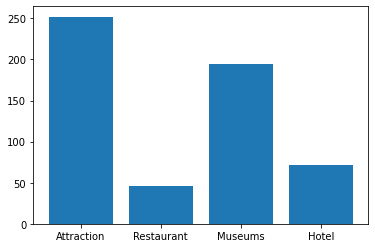

kolkata


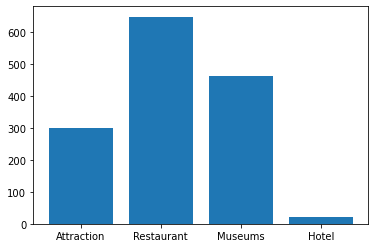

Ahmedabad


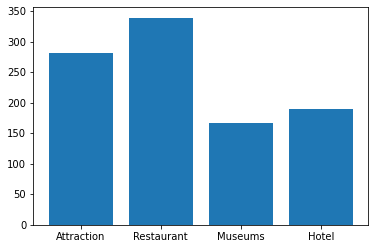

Chennai


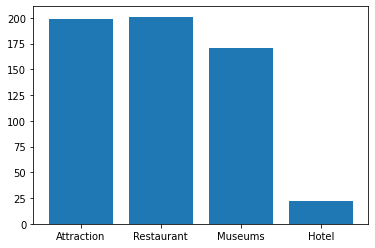

nagpur


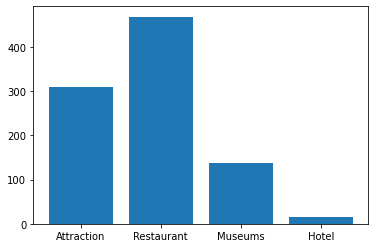

nashik


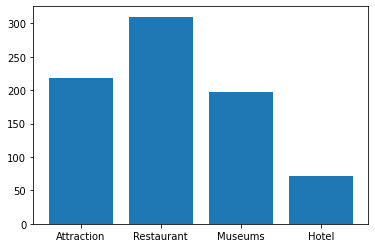

hydrabad


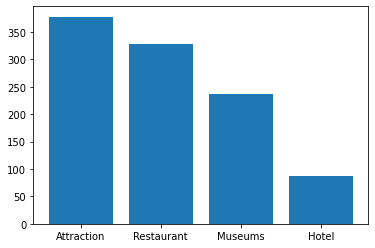

Aurangabad


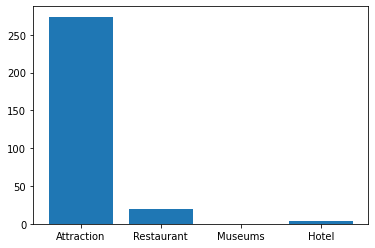

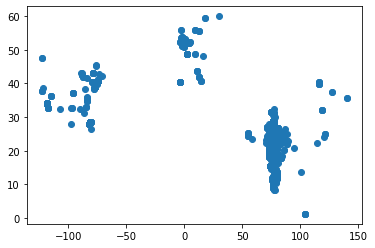

In [15]:
#ScatterPlot Between Longitude and Latitude
plt.scatter(x=df['Longitude'],y=df['Latitude'])
plt.show()

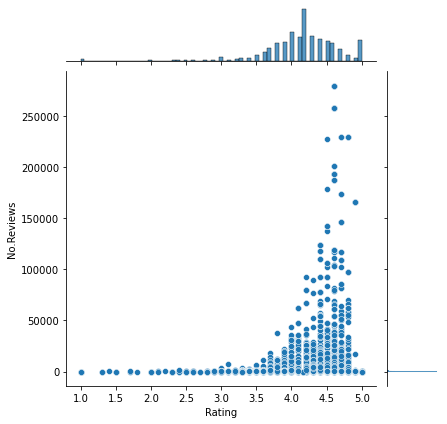

In [16]:
#joint plot between Rating and No. Reviews
sns.jointplot(x='Rating',y='No.Reviews',data=df)

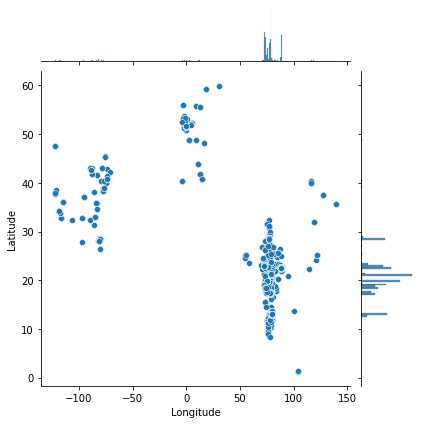

In [17]:
#jointplot between Longitude Latitude
sns.jointplot(x='Longitude',y='Latitude',data=df)

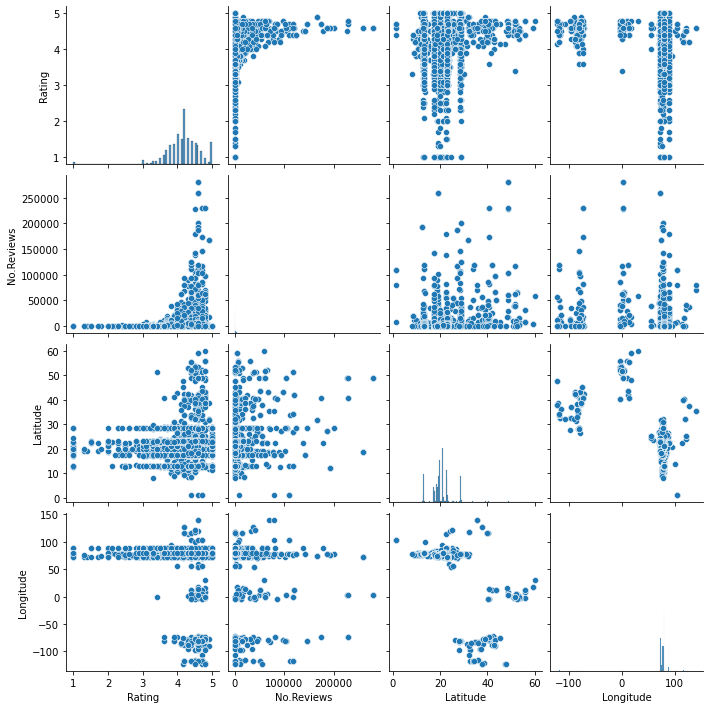

In [18]:
#complete pair plot
sns.pairplot(df)

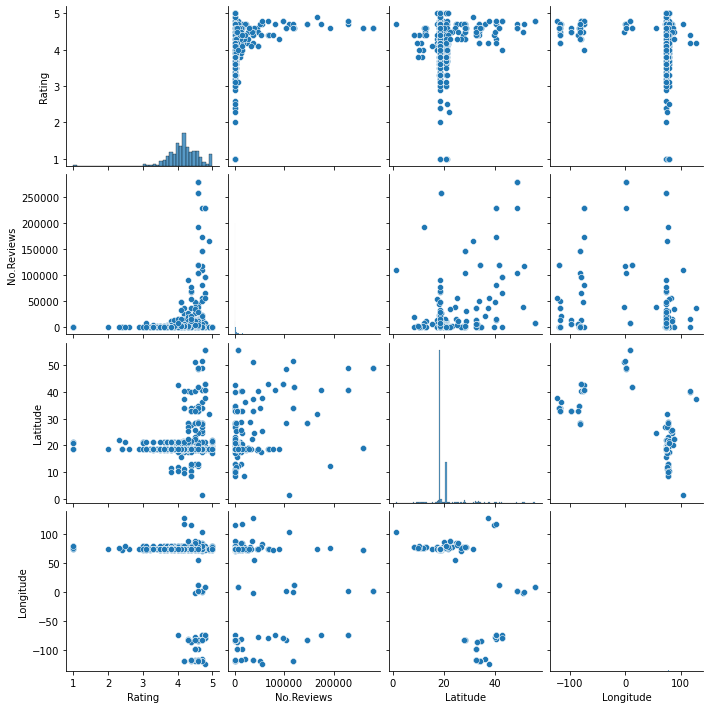

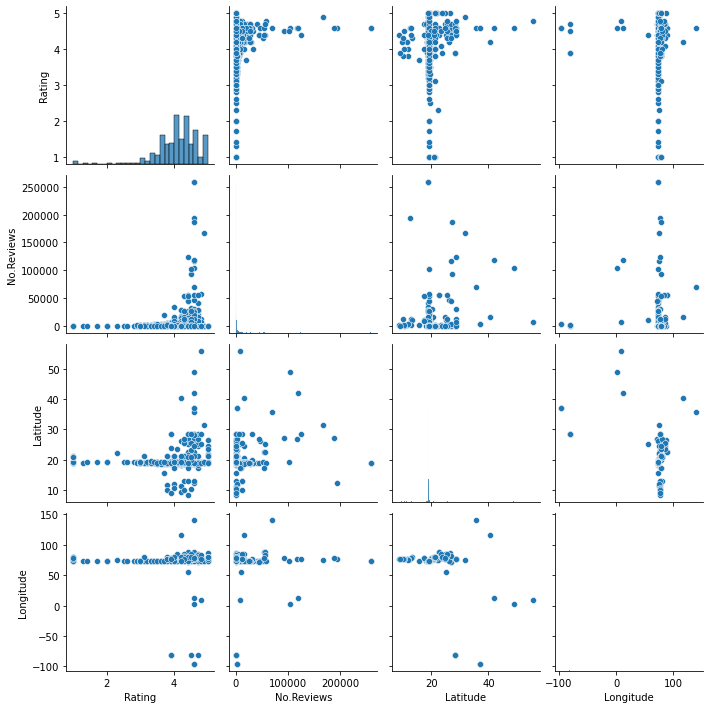

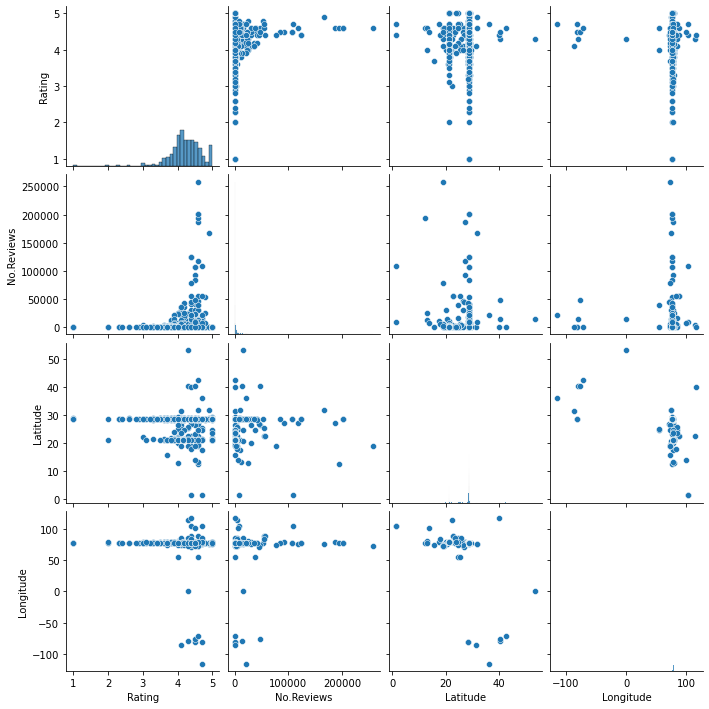

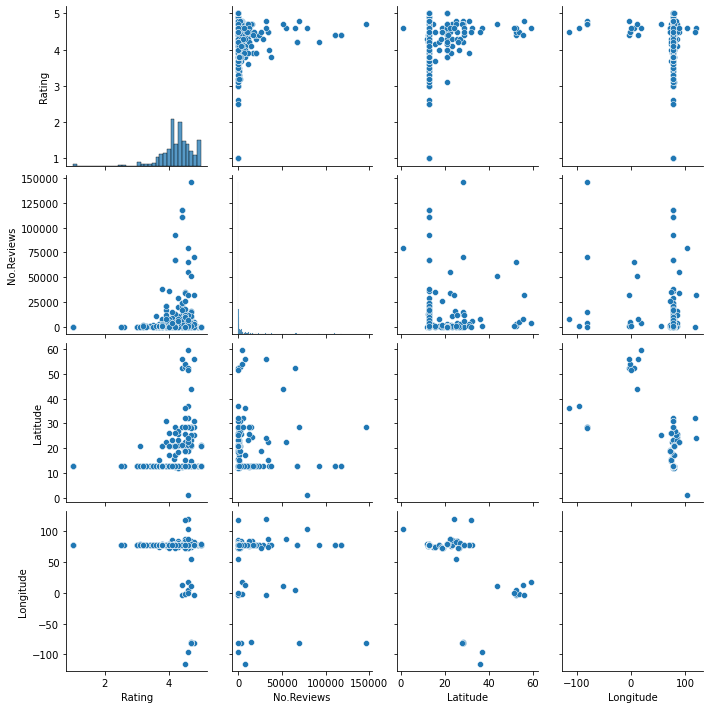

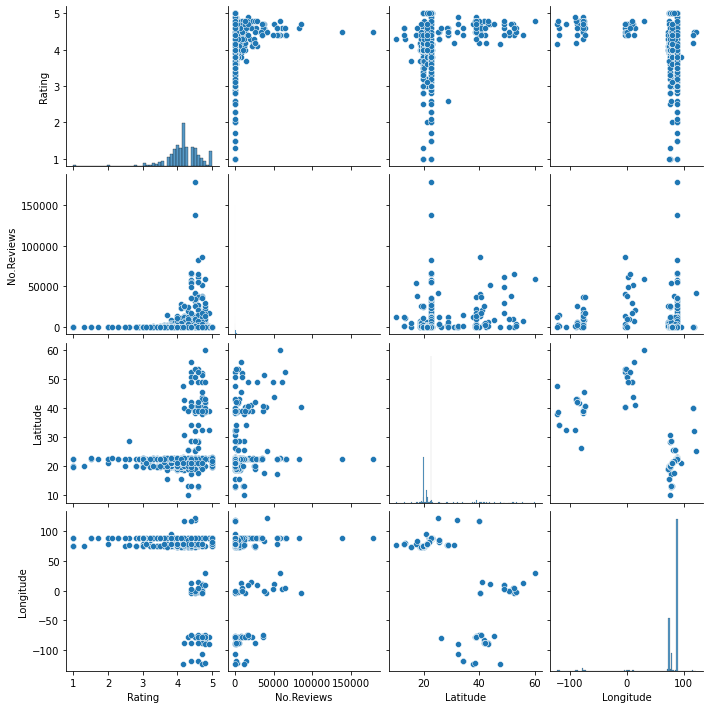

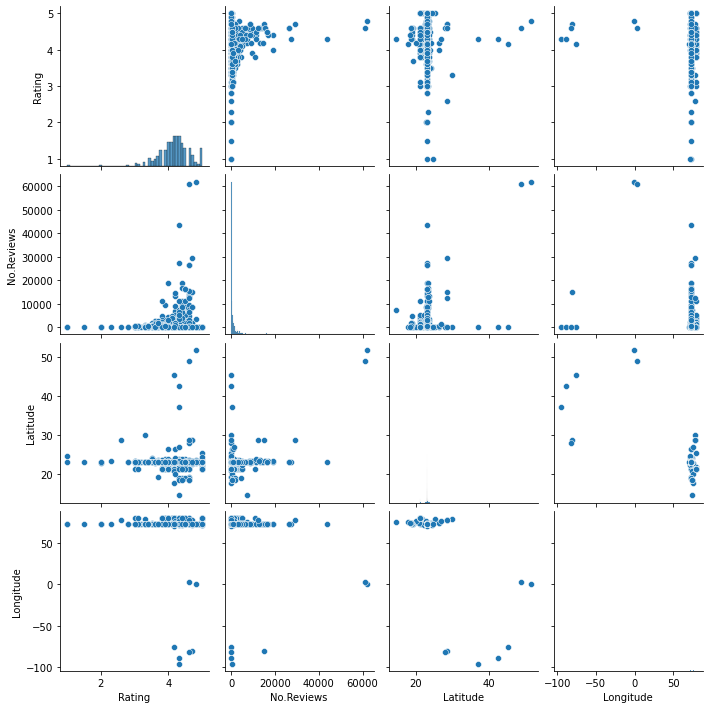

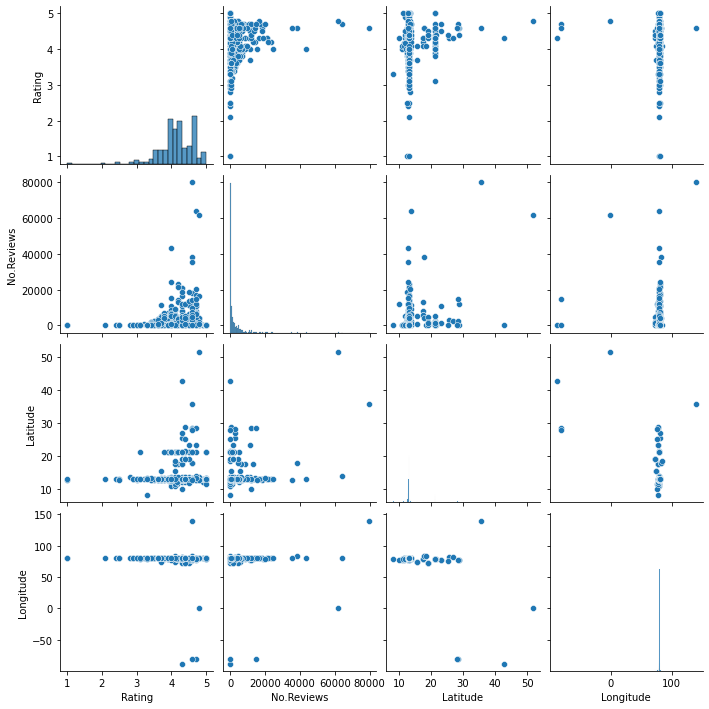

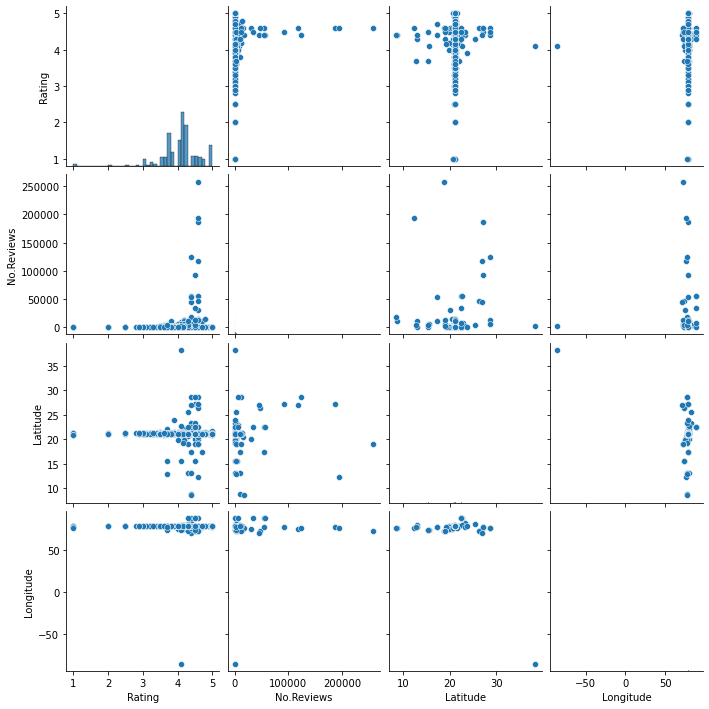

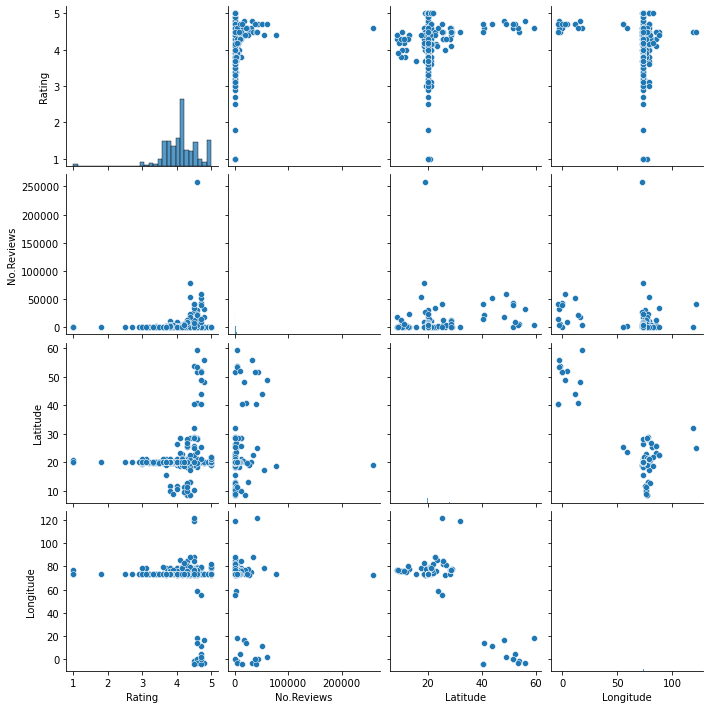

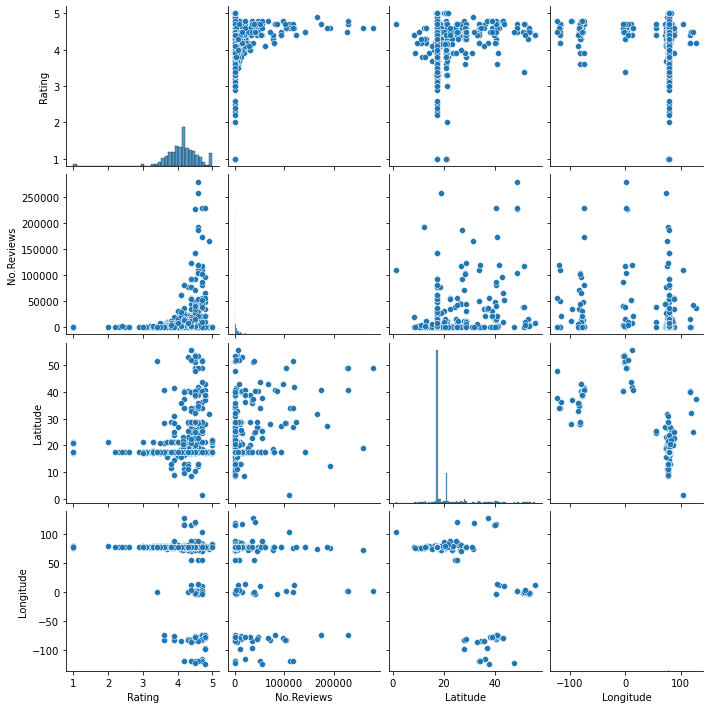

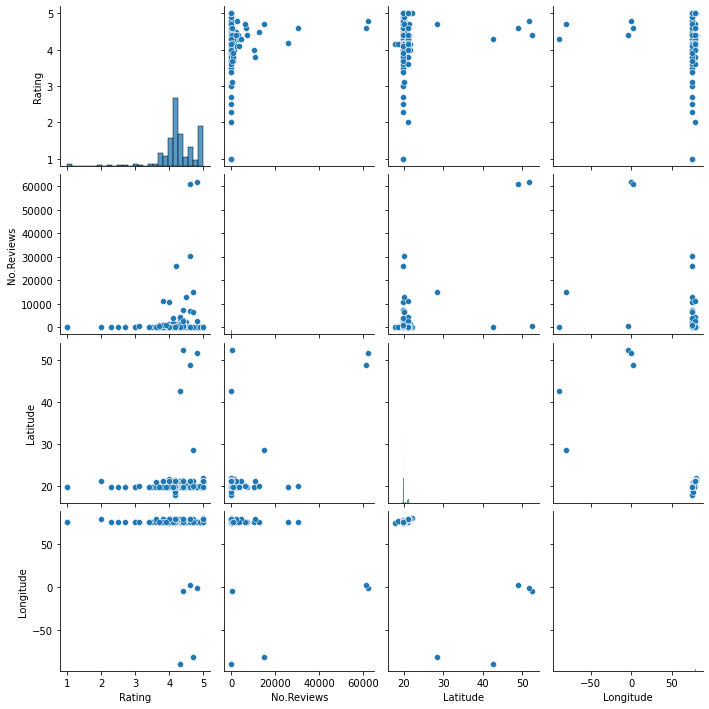

In [19]:
#pair plot per city
grouped = df.groupby(df['City'])
for c in cities:
    dfT = grouped.get_group(c)
    sns.pairplot(dfT)

In [ ]:
#grouped = df.groupby(df['City'])

In [ ]:
#for c in cities:
#    sizes = []
#    dfT = grouped.get_group(c)
#    tempDf = dfT.groupby(dfT['Type'])
#    for t in types:
#        try:
#            sizes.append(len(tempDf.get_group(t)))
#        except:
#            sizes.append(0)
    #plt.pie(sizes, labels=types,
    #autopct='%1.1f%%', shadow=True)
    
    #plt.axis('equal')
    #plt.show()
#    print(c)

In [21]:
#corrolation
df.corr()

,Rating,No.Reviews,Latitude,Longitude
Rating,1.000000,0.127868,0.088615,-0.110245
No.Reviews,0.127868,1.000000,0.211864,-0.223864
Latitude,0.088615,0.211864,1.000000,-0.468435
Longitude,-0.110245,-0.223864,-0.468435,1.000000


<AxesSubplot:>

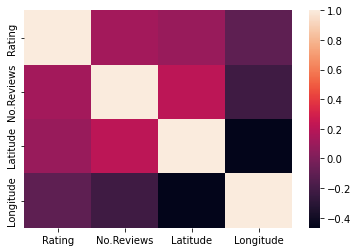

In [22]:
#heatmap
sns.heatmap(df.corr())

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

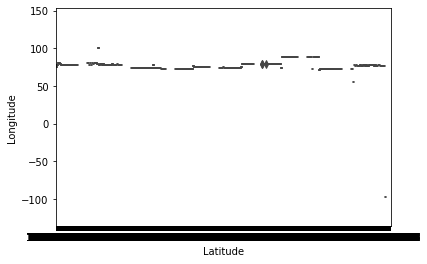

In [23]:
sns.boxplot('Latitude','Longitude', data=df)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='Rating'>

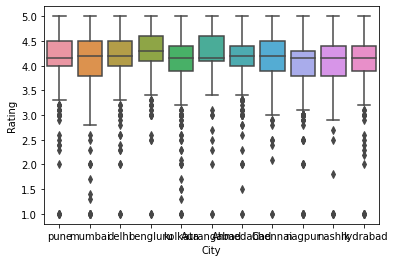

In [24]:
sns.boxplot('City','Rating', data=df)

## normalization and scalling

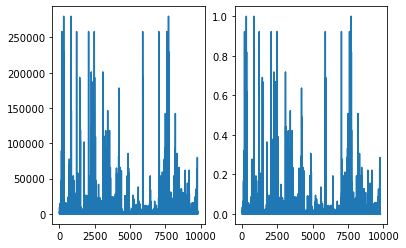

In [27]:
#Normalization maximum abs scaling
df_max_scaled = df.copy()

df_max_scaled['No.Reviews']  = df_max_scaled['No.Reviews'] / df_max_scaled['No.Reviews'].abs().max()

df_max_scaled['No.Reviews']
plt.subplot(1,2,1)
plt.plot(df["No.Reviews"])
plt.subplot(1,2,2)
plt.plot(df_max_scaled['No.Reviews'])

In [11]:
df_min_max_scaled = df.copy()
df_min_max_scaled['No.Reviews'] = (df_min_max_scaled['No.Reviews']-df_min_max_scaled['No.Reviews'].min())/ (df_min_max_scaled['No.Reviews'].max()-df_min_max_scaled['No.Reviews'].min())

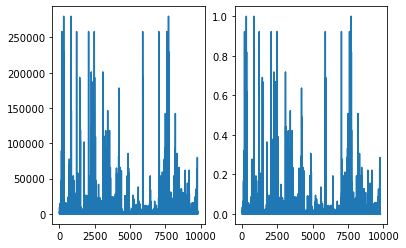

In [28]:
#using min-max scaling
df_min_max_scaled = df.copy()
df_min_max_scaled['No.Reviews'] = (df_min_max_scaled['No.Reviews']-df_min_max_scaled['No.Reviews'].min())/ (df_min_max_scaled['No.Reviews'].max()-df_min_max_scaled['No.Reviews'].min())
df_min_max_scaled['No.Reviews']
plt.subplot(1,2,1)
plt.plot(df["No.Reviews"])
plt.subplot(1,2,2)
plt.plot(df_min_max_scaled['No.Reviews'])

## Encoding

In [33]:
df['CityCEncoding'] = df['City'].apply(lambda x : cities.index(x))
df['TypeCEncoding'] = df['Type'].apply(lambda x : typ.index(x))

## Similarities

### Cosine Similarities

In [34]:
CosineCityEncodingAndRating = np.dot(df['CityCEncoding'],df['Rating'])/(np.linalg.norm(df['CityCEncoding'])*np.linalg.norm(df['Rating']))
print(CosineCityEncodingAndRating)

0.8243357356424241


In [35]:
CosineCityEncodingAndRating = np.dot(df['TypeCEncoding'],df['CityCEncoding'])/(np.linalg.norm(df['TypeCEncoding'])*np.linalg.norm(df['CityCEncoding']))
print(CosineCityEncodingAndRating)

0.6373773626479448


In [36]:
CosineCityEncodingAndRating = np.dot(df['TypeCEncoding'],df['Rating'])/(np.linalg.norm(df['TypeCEncoding'])*np.linalg.norm(df['Rating']))
print(CosineCityEncodingAndRating)

0.7622546371121588


In [37]:
CosineCityEncodingAndRating = np.dot(df['CityCEncoding'],df['No.Reviews'])/(np.linalg.norm(df['CityCEncoding'])*np.linalg.norm(df['No.Reviews']))
print(CosineCityEncodingAndRating)

0.1653540990685008


In [38]:
CosineCityEncodingAndRating = np.dot(df['TypeCEncoding'],df['No.Reviews'])/(np.linalg.norm(df['TypeCEncoding'])*np.linalg.norm(df['No.Reviews']))
print(CosineCityEncodingAndRating)

0.09418932612778276


### Jaccard Similarities

In [39]:
def jaccard_set(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [40]:
jaccard_set(df['TypeCEncoding'],df['No.Reviews'])

0.0002081382037673015

In [41]:
jaccard_set(df['TypeCEncoding'],df['Rating'])

0.00015609553046464435

In [42]:
jaccard_set(df['TypeCEncoding'],df['CityCEncoding'])

0.0002081382037673015

In [43]:
jaccard_set(df['CityCEncoding'],df['Rating'])

0.00026018629338606444

In [44]:
jaccard_set(df['CityCEncoding'],df['No.Reviews'])

0.0005725886211024934

## Hashing

In [38]:
import time
from datasketch import MinHash, MinHashLSHForest

In [39]:
#Number of Permutations
permutations = 128

#Number of Recommendations to return
num_recommendations = 1

In [40]:
def token(string):
    result = []
    try:
        arr = list(string.split(" "))
    except:
        return "None"
    for i in arr:
        result.append(str(i))
    return result

In [41]:
def get_forest(data, perms):
    start_time = time.time()
    
    minhash = []
    
    for text in df['Address']:
        text = text.lower()
        tokens = token(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=perms)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))
    
    return forest

In [42]:
def predict(text, database, perms, num_results, forest):
    start_time = time.time()
    tokens = token(text)
    print(tokens)
    m = MinHash(num_perm=perms)
    for s in tokens:
        s = s.lower()
        m.update(s.encode('utf8'))
        
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # if your query is empty, return none
    
    #result = database.iloc[idx_array]['Address']
    
    print('It took %s seconds to query forest.' %(time.time()-start_time))
    
    return idx_array

In [43]:
forest = get_forest(df, permutations)

It took 9.690842866897583 seconds to build forest.


In [44]:
def GiveLocations(query,howmany=1):
    query = query.lower()
    result = predict(query, df, permutations, howmany, forest)
    return result
    

In [98]:
num_recommendations = 100
text = 'mumbai'
result = predict(text, df, permutations, num_recommendations, forest)
print(type(result))
result = GiveLocations("mumbai")
for i in result:
    print(df.iloc[i])
print('\n Top Recommendation(s) is(are) \n', result)

['mumbai']
It took 0.0019960403442382812 seconds to query forest.
<class 'numpy.ndarray'>
['mumbai']
It took 0.005516529083251953 seconds to query forest.
Name                                                Fort George
Address       1, Frere Rd, Mumbai Port Trust, Mazgaon, Mumba...
Rating                                                      3.9
No.Reviews                                                   71
Timings       Wednesday (Republic Day), Open 24 hours, Hours...
Type                                                 Attraction
City                                                     mumbai
Latitude                                               18.94045
Longitude                                             72.838766
Name: 1267, dtype: object

 Top Recommendation(s) is(are) 
 [1246]


## KNN

In [15]:
import geopy.distance

In [120]:
longs = np.array(df['Longitude'])
lats = np.array(df['Latitude'])
rating = np.array(df_min_max_scaled['Rating']);
review = np.array(df_min_max_scaled['No.Reviews']);

#dist = (x,y)
#source = (x,y)
def GiveDistance(dist,source):
    return geopy.distance.distance(dist,source)

def KNN(distances,k=10):
    index = np.argpartition(distances,k)
    nearest = index[:k]
    return nearest
    

def showNearBy(source,k=10):
    n = len(longs)
    for i in range(n):
        if(longs[i]>90 or longs[i]<-90): longs[i]=0;
        if(lats[i]>90 or lats[i]<-90): lats[i]=0;
    distances = [GiveDistance((longs[i],lats[i]),source) for i in range(n)]
    return KNN(distances,k)



k = 10
def weight(rating,review):
    return rating*0.5+review*0.5

def wightArray(arr):
    distances = [weight(rating[i],review[i]) for i in arr]
    return distances

def showresult(result):
    indices = [result[i] for i in range(len(result))]
    distances = wightArray(result)
    dec = {}
    try:
        if(indices[0][0]):
            indices = indices[0]
    except:
        pass
        
    try:
        if(distances[0][0]):
            distances = distances[0]
    except:
        pass
    
    for i in range(len(indices)):
        dec[distances[i]] = indices[i]
    k = 5
    while(k>len(distances)):
        k -=1 
    ANS = KNN(distances,k)
    for i in ANS:
        indices[i] = dec[distances[i]]
    return printResult(indices)
    

def printResult(result):
    no = 1;
    for i in ans:
        print(f"Result NO. {no}")
        print(df.iloc[i])
        no+=1
        print("-----------------------------------------------")
    

# user End

In [121]:
def recommandMe(longitude=None, latitude=None, keywords=None):
    if((not longitude or not latitude) and not keywords):
        return "NO recommandation : please Specify the location"
    elif(keywords):
        result = []
        keywords = keywords.lower()
        distances = GiveLocations(keywords)
        for i in distances:
            result.append(showNearBy((df.iloc[i]['Longitude'],df.iloc[i]['Latitude'])))
    else :
        result = showNearBy((longitude, latitude))
    return showresult(result)
    
    

In [123]:
recommandMe(longitude=18.6431655,latitude=73.4146587,keywords=None)


[3450, 7098, 4744, 8131, 4689, 3458, 312, 1448, 844, 7099]
[2.3075473719929276, 2.3075473719929276, 2.5047934563248977, 2.2136088439626382, 2.2136106299001663, 2.2136088439626382, 2.412915900201811, 2.412914114264283, 2.412915900201811, 2.4309806582965727]
Result NO. 1
Name                                             Nationalmuseum
Address       Södra Blasieholmshamnen 2, 111 48 Stockholm, S...
Rating                                                      4.6
No.Reviews                                                 4226
Timings                                                        
Type                                                    Museums
City                                                     nashik
Latitude                                               59.32849
Longitude                                             18.078239
Name: 7264, dtype: object
-----------------------------------------------
Result NO. 2
Name                              Kunsthistorisches Museum Wien
Add

In [124]:
### KNN for best
recommandMe(keywords='nashik')

['nashik']
It took 0.00500035285949707 seconds to query forest.
[6353 6587 6498 6321 6340 7130 7170 6735 6517 7180]
[2.00053935 1.95737056 1.8502536  2.10188059 2.101702   1.85014109
 1.90036969 2.07892698 1.90354509 1.90036612]
Result NO. 1
Name                                             Nationalmuseum
Address       Södra Blasieholmshamnen 2, 111 48 Stockholm, S...
Rating                                                      4.6
No.Reviews                                                 4226
Timings                                                        
Type                                                    Museums
City                                                     nashik
Latitude                                               59.32849
Longitude                                             18.078239
Name: 7264, dtype: object
-----------------------------------------------
Result NO. 2
Name                              Kunsthistorisches Museum Wien
Address               Maria-The